# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/4

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [ ]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
#key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"
key_api_ECOS = "X86F3N6MT6RRYXJ35P87"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [ ]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_Fi

## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


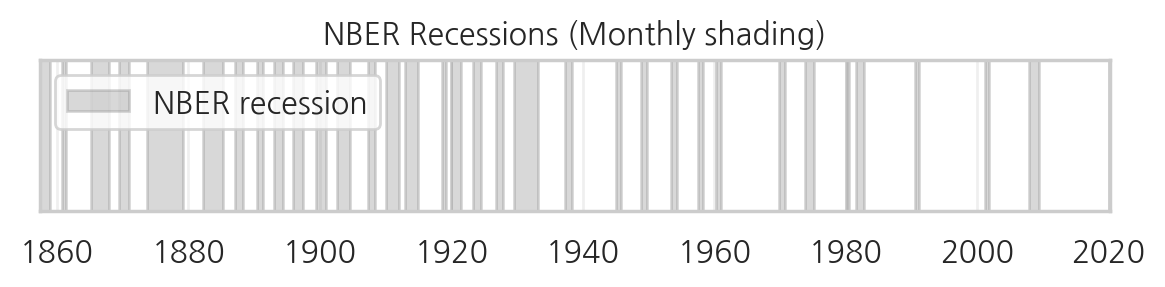

In [ ]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## **내용**
- 관련 기사 및 읽을거리
- 사전준비
- numpy_financial의 기능
- 채권 pricing
- TIPS



## 관련 기사 및 읽을거리

-

## 사전준비

1. Google colab matplotlib에서 한글 폰트 깨지는 문제 해결: 아래 (1), (2) 중 하나를 실행

  (1) koreanize_matplotlib 라이브러리 사용: 간편하나 안 될 경우 (2)를 사용
  
  (2) 폰트 다운하고 재실행

2. 구글 드라이브 mount

In [ ]:
'''
# (1) koreanize_matplotlib 라이브러리 사용
!pip install koreanize_matplotlib
import koreanize_matplotlib
'''

'\n# (1) koreanize_matplotlib 라이브러리 사용\n!pip install koreanize_matplotlib\nimport koreanize_matplotlib\n'

In [ ]:

# (2) Google Colab matplotlib 한글 폰트 깨지는 문제 해결

#1. 이 셀을 실행
#2. 좌측 상단 메뉴에서 Runtime -> Restart session
#3. 노트북 파일을 처음부터 다시 실행

#* 그림에 한글이 들어갈 경우에만 필요한 작업임


# 1. 나눔 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath)

# matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os
import pandas_datareader as pdr
from datetime import date

import statsmodels.api as sm # module for stats models
from statsmodels.iolib.summary2 import summary_col # module for presenting stats models outputs nicely

import pandas_datareader.data as web  # module for reading datasets directly from the web
from pandas_datareader.famafrench import get_available_datasets

#sns.set_style('whitegrid')
#sns.set_style('darkgrid')
#sns.set_theme()

#sns.set(rc={'figure.figsize':(6,4)})

# for Korean fonts
plt.rcParams['axes.unicode_minus'] = False

# for preferred display
%config InlineBackend.figure_format = 'retina'   # for retina display in Mac
np.set_printoptions(precision=3, suppress=True)  # for pretty display of numpy arrays
pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 10

In [ ]:
# to plot pretty figures
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True

mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('font', size=12)
plt.rc('legend', fontsize=12)

# Where to save the figures: google drive를 연동해야 함
DIR = "/content/drive/MyDrive/Colab Notebooks/Textbook_FinancialEconomics/figures/"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=600)

## 기초 개념들

- pv (Present Value) = how much my money is worth today
- fv (Future Value) = how much my money is worth in the future

- 단리 (simple interest): 원금에만 이자가 붙음, $fv = pv + pv \times r \times n = pv\times(1+r n)$
- 복리 (compound interest): 이자에도 이자가 붙음, $fv = pv \times (1+r)^n$



In [ ]:
pv = 1000 # principal
n = 12.   # number of periods
r = 0.05  # interest rate

# simple interest
pv1 = pv*(1+n*r)
print(f'In case of simple interest, I earn ${pv1:.1f}.')

# compound interest
pv2 = pv*(1+r)**n
print(f'In case of compound interest, I earn ${pv2:.1f}.')

In case of simple interest, I earn $1600.0.
In case of compound interest, I earn $1795.9.


## numpy_financial의 기능


In [ ]:
!pip install numpy-financial
import numpy_financial as npf


### npf.fv (fv 구하기)

$1,000을 10년간 투자하는데 연간 이자율은 5%인 상황에서 10년 후 내 자산은 얼마일까?
1. 이자가 연 단위로 지급되는 경우
2. 이자가 월 단위로 지급되는 경우
3. 이자가 일 단위로 지급되는 경우

**By convention, we put (-) on cash flows out.**

In [ ]:
# using annual compounding frequency
fv = npf.fv(rate = 0.05, nper = 10, pmt = 0, pv = -1000)
print(fv)

# using monthly compounding frequency
fv = npf.fv(rate = 0.05/12, nper = 12*10, pmt = 0, pv = -1000)
print(fv)


# using daily compounding frequency
fv = npf.fv(rate = 0.05/365, nper = 365*10, pmt = 0, pv = -1000)
print(fv)

1628.894626777442
1647.00949769028
1648.6648137652346


$1,000을 투자하고 매년 $100씩 추가하는 경우 연간 이자율이 5%인 상황에서 10년 후 내 자산은 얼마일까?

In [ ]:
fv = npf.fv(rate = 0.05, nper = 10, pmt = -100, pv = -1000)
print(fv)

2886.683880332326


### npf.nper (pv가 fv가 되는데 걸리는 시간)

In [ ]:
# 연이율 5%, 매달 200만원씩 저축해서 1억을 만드는데 걸리는 시간 (이자는 매월 붙는 경우)
number_period = npf.nper(rate=0.05/12, pmt=-200, pv=0, fv=10000)
print(f'1억원을 모으는데 걸리는 시간은 총 {number_period:.1f}개월임.')

1억원을 모으는데 걸리는 시간은 총 45.5개월임.


### npf.pmt (pv가 fv가 되기 위해 매기 지급(저축)해야 하는 액수)

In [ ]:
# 연이율 5%, 4년 동안 1억을 저축하기 위해 매월 얼마나 저축해야 하는가? (이자는 매월 붙는 경우)
monthly_pmt = npf.pmt(rate=0.05/12, nper=4*12, pv=0,fv=10000)
print(f'1억원을 모으는데 4년 동안 매달 {-monthly_pmt:.1f}만원씩 저축해야 함.')

1억원을 모으는데 4년 동안 매달 188.6만원씩 저축해야 함.


In [ ]:
# 연이율 5%, 만기 4년으로 1억을 빌렸는데 매달 얼마씩 갚아야 하는가?   (이자는 매월 붙는 경우)
monthly_pmt = npf.pmt(rate=0.05/12, nper=4*12, pv=10000,fv=0)
print(f'1억원 대출을 갚기 위해 4년 동안 매달 {-monthly_pmt:.1f}만원씩 납부해야 함.')

1억원 대출을 갚기 위해 4년 동안 매달 230.3만원씩 납부해야 함.


### npf.rate (pv가 fv가 되기 위해 필요한 이자율)

In [ ]:
# 4년 동안 매달 200만원씩 저축해서 1억을 모으기 위해서는 이자율이 얼마여야 하는가? (이자는 매월 붙는 경우)
monthly_rate = npf.rate(nper=4*12, pmt = -200, pv=0, fv=10000)
print(f'4년 동안 매달 200만원씩 납부해서 1억원을 모으려면 연이율 {12*100*monthly_rate:.3f}%이어야 함.')

4년 동안 매달 200만원씩 납부해서 1억원을 모으려면 연이율 2.072%이어야 함.


### npf.pv (pv 구하기)

In [ ]:
# 5% 연간 이자율, 10년 뒤 1천만원을 모으기 위해서 현재 얼마를 투자해야 하는가?
pv = npf.pv(rate=0.05, nper=10, pmt= 0, fv=1000)
print(f'10년 뒤 1천만원을 모으기 위해서는 현재 {-pv:.1f}만원을 투자해야 함')

10년 뒤 1천만원을 모으기 위해서는 현재 613.9만원을 투자해야 함


## Bond Pricing


### zero-coupon bond

- npf.pv를 이용해서 구할 수 있음

In [ ]:
# 액면가 $1,000, 3년 만기 채권, 5% 연간 이자율인 경우 채권의 가격은?
price = npf.pv(rate=0.05, nper=3, pmt=0, fv=1000)
print(f'채권 가격은 ${-price:.1f}임')

채권 가격은 $863.8임


### coupon bond

- coupon rate = 8%
- semi-annual coupon payment
- interest rate = 5%
- maturity = 10 years
- par value = $1,000

In [ ]:
coupon_rate = 0.08  # 이표율
i = 0.05            # 시장 이자율 또는 할인율
n = 2               # 1년에 이표가 지급되는 횟수
maturity = 10       # 만기
facevalue = 1000    # 액면가

price = npf.pv(rate=i/n, nper = n*maturity, pmt=facevalue*(coupon_rate/n), fv=1000)
print(f'채권 가격 = {-price:.2f}만원')

채권 가격 = 1233.84만원


In [ ]:
# 무이표채(zero-coupon bond)의 경우
price_discount = npf.pv(rate=i, nper = maturity, pmt=0, fv=1000)
print(f'무이표채 가격 = {-price_discount:.2f}만원')

무이표채 가격 = 613.91만원


In [ ]:
# 위의 식 확인
1000/((1+0.05)**10)

613.9132535407591

In [ ]:
price_interest = []
int_rate = np.arange(1,21,1)

for irate in int_rate:
  irate = irate/100
  price = -npf.pv(rate=irate/n, nper = n*maturity, pmt=facevalue*(coupon_rate/n), fv=1000)
  price_interest.append(price)

Saving figure bond_price_interest


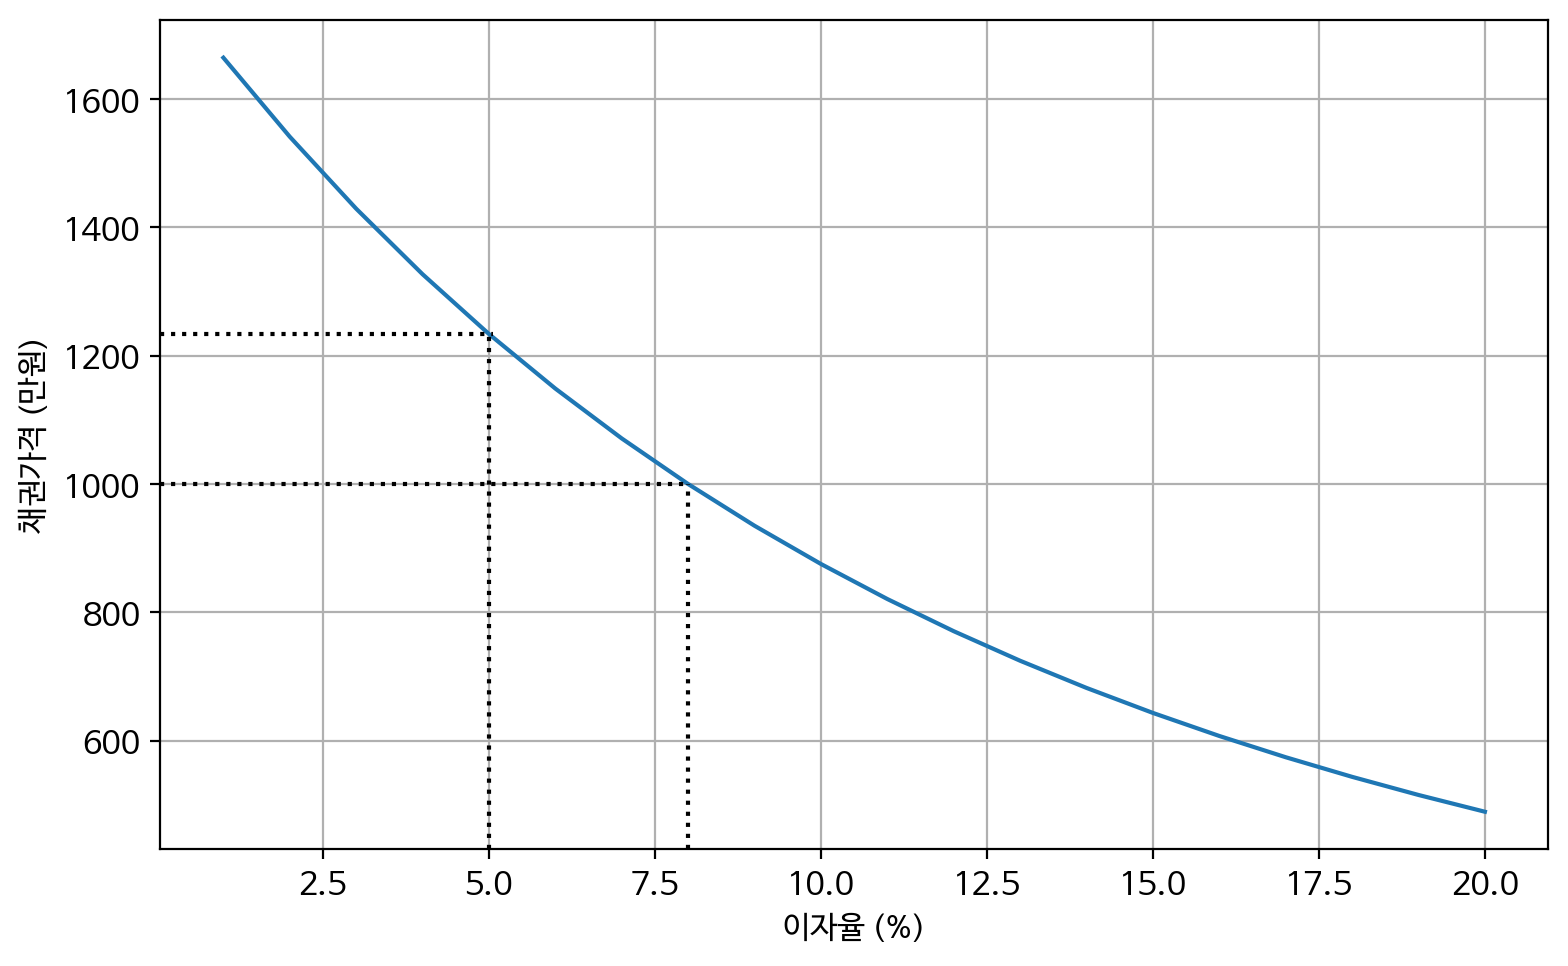

In [ ]:
plt.plot(int_rate, price_interest)
plt.xlabel('이자율 (%)', fontsize=11)
plt.ylabel('채권가격 (만원)',fontsize=11)

plt.axhline(y=1233.84, xmax=0.24, color='k', linestyle='dotted')
plt.axhline(y=1000, xmax=0.38, color='k', linestyle='dotted')

plt.axvline(x=5, ymax = 0.62, color='k', linestyle='dotted')
plt.axvline(x=8, ymax = 0.44, color='k', linestyle='dotted')

save_fig('bond_price_interest')

plt.show()

In [ ]:
# Pandas DataFrame을 latex table 형태로 출력하는 라이브러리
!pip install -q latextable

In [ ]:
coupon_rate = 0.05
i = 0.05
n = 2
maturity = 30
facevalue = 1000

maturity = [1, 5, 10, 20, 30]
mkt_rate = [0.01, 0.03, 0.05, 0.07, 0.09]

bond_price = []

for m in maturity:
    for i in mkt_rate:
      price = npf.pv(rate=i/2, nper = n*m, pmt=facevalue*(coupon_rate/n),fv=1000)
      bond_price.append(-price)

In [ ]:
bond_price = pd.DataFrame(np.reshape(bond_price, (5,5)), columns = [mkt_rate], index=[maturity])
pd.options.display.float_format = '{:.2f}'.format
bond_price

,0.01,0.03,0.05,0.07,0.09
1,1039.70,1019.56,1000.00,981.00,962.55
5,1194.61,1092.22,1000.00,916.83,841.75
10,1379.75,1171.69,1000.00,857.88,739.84
20,1723.44,1299.16,1000.00,786.45,631.97
30,2034.51,1393.80,1000.00,750.55,587.24


- which bonds are more sensitive to market interest rate changes?

In [ ]:
# source: https://colab.research.google.com/drive/1Iq10lHznMngg1-Uoo-QtpTPii1JDYSQA?usp=sharing

from tabulate import tabulate
from texttable import Texttable

import latextable

print('\nTabulate Latex:')
print(tabulate(bond_price, tablefmt='latex'))


Tabulate Latex:
\begin{tabular}{lrrrrr}
\hline
 (1,)  & 1039.7  & 1019.56 & 1000 & 981.003 & 962.547 \\
 (5,)  & 1194.61 & 1092.22 & 1000 & 916.834 & 841.746 \\
 (10,) & 1379.75 & 1171.69 & 1000 & 857.876 & 739.841 \\
 (20,) & 1723.44 & 1299.16 & 1000 & 786.449 & 631.968 \\
 (30,) & 2034.51 & 1393.8  & 1000 & 750.553 & 587.24  \\
\hline
\end{tabular}


### YTM

In [ ]:
coupon_rate = 0.08
n = 2
maturity = 10
facevalue = 1000
price = 1233.84

ytm = npf.rate(nper=n*maturity, pmt = facevalue*(coupon_rate/n), pv=-price, fv=1000)
print(f'6개월 yield =  {100*ytm:.2f}%')
print(f'annualized ytm ("bond equivalent yields") = {2*100*ytm:.2f}%')
print(f'effective ytm = {100*((1+ytm)**2-1):.2f}%')

6개월 yield =  2.50%
annualized ytm ("bond equivalent yields") = 5.00%
effective ytm = 5.06%


In [ ]:
i = ytm*2

price  = npf.pv(rate = i/2, nper=n*maturity, pmt = facevalue*(coupon_rate/n), fv=1000)
print(f"bond price is ${-price:.2f}")

bond price is $1233.84


In [ ]:
print(f'경상수익률(current yield)= {-100*facevalue*coupon_rate/price}%')

경상수익률(current yield)= 6.48382286195941%


### Premium bond and discount bond

- premium bond: bonds that sell above par value
- discount bond: bonds that sell below par value

In [ ]:
coupon_rate1 = 0.08
coupon_rate2 = 0.02
i = 0.05
n = 2
facevalue = 1000
maturity = 30

maturities1 = np.arange(1,maturity+1,1)
maturities2 = 30-maturities1

price1 = -npf.pv(rate = i/2, nper=n*maturities2, pmt = facevalue*(coupon_rate1/n), fv=1000)
price2 = -npf.pv(rate = i/2, nper=n*maturities2, pmt = facevalue*(coupon_rate2/n), fv=1000)

Saving figure bond_premium_discount


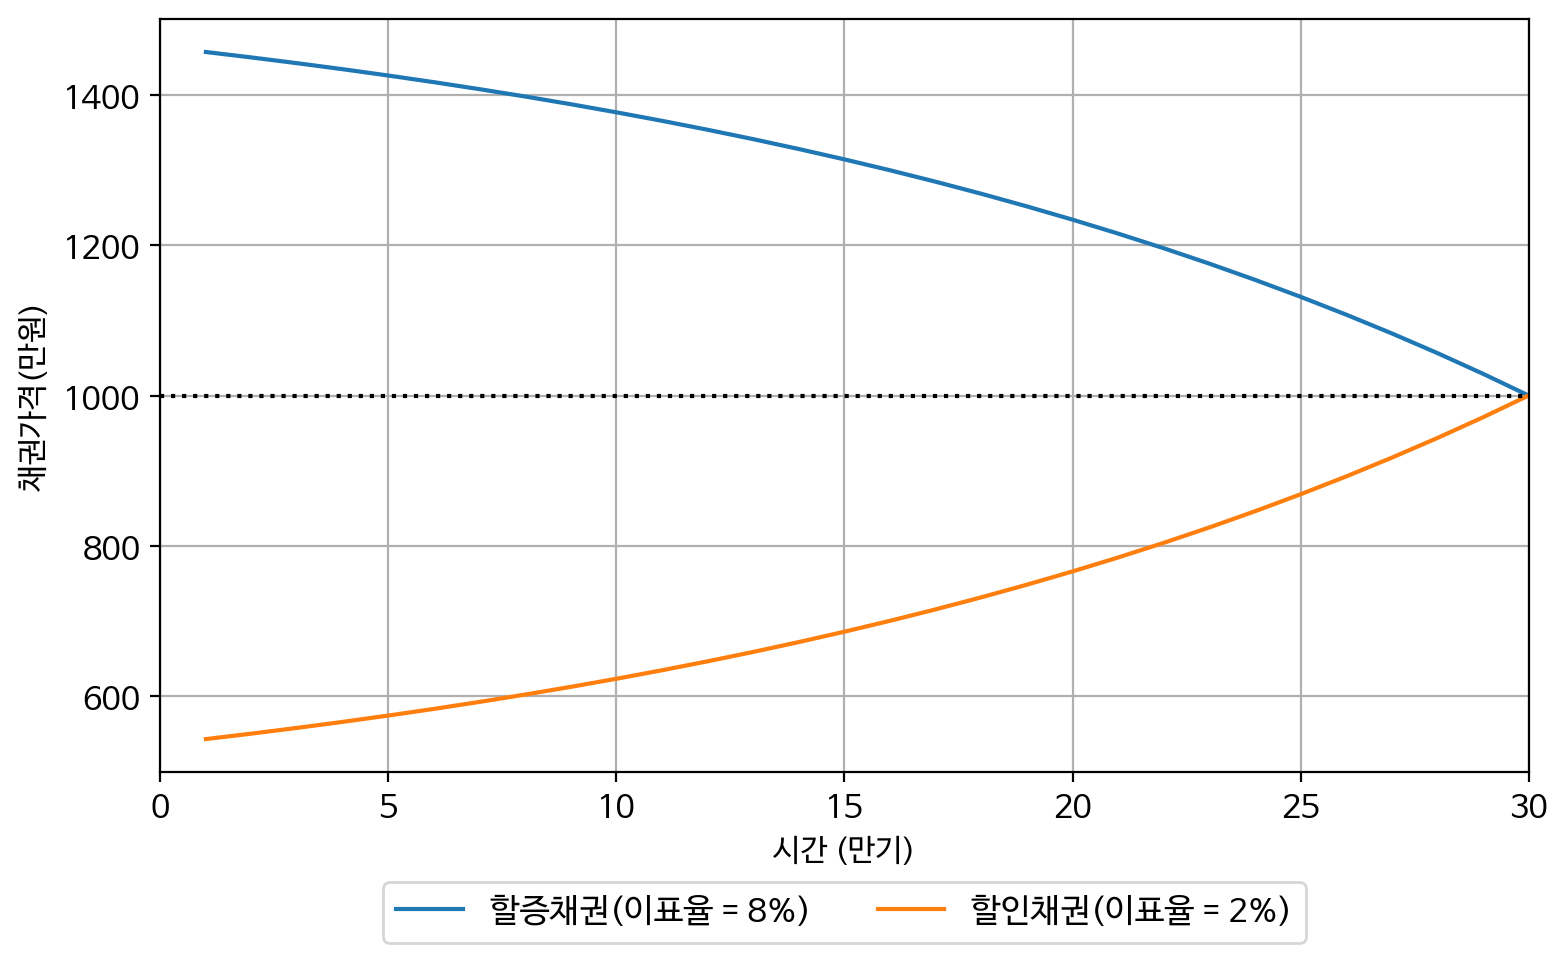

In [ ]:
plt.plot(maturities1, price1, label='할증채권(이표율 = 8%)')
plt.plot(maturities1, price2, label='할인채권(이표율 = 2%)')
plt.axhline(y=1000, color='k', linestyle='dotted')

plt.xlabel('시간 (만기)', fontsize=11)
plt.ylabel('채권가격(만원)',fontsize=11)
plt.axis([0, 30, 500, 1500])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

save_fig('bond_premium_discount')

plt.show()

### 수익률에 영향을 미치는 요인들

In [ ]:
# NBER recession periods: https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States

'''
ax.axvspan('1973-11','1975-03', alpha=0.3, color='grey')
ax.axvspan('1980-01','1980-07', alpha=0.3, color='grey')
ax.axvspan('1981-07','1982-11', alpha=0.3, color='grey')
ax.axvspan('1990-06','1991-03', alpha=0.3, color='grey')
ax.axvspan('2001-03','2001-11', alpha=0.3, color='grey')
ax.axvspan('2007-12','2009-06', alpha=0.3, color='grey')
ax.axvspan('2020-02','2020-04', alpha=0.3, color='grey')
'''

"\nax.axvspan('1973-11','1975-03', alpha=0.3, color='grey')\nax.axvspan('1980-01','1980-07', alpha=0.3, color='grey')\nax.axvspan('1981-07','1982-11', alpha=0.3, color='grey')\nax.axvspan('1990-06','1991-03', alpha=0.3, color='grey')\nax.axvspan('1990-06','1991-03', alpha=0.3, color='grey')\nax.axvspan('2001-03','2001-11', alpha=0.3, color='grey')\nax.axvspan('2007-12','2009-06', alpha=0.3, color='grey')\nax.axvspan('2020-02','2020-04', alpha=0.3, color='grey')\n"

In [ ]:
# 20-Year Treasury Constant Maturity Rate (DGS20)
# 20-Year Treasury Inflation-Indexed Security, Constant Maturity (DFII20)
# Moody's Seasoned Aaa Corporate Bond Yield (DAAA)
# Moody's Seasoned Baa Corporate Bond Yield (DBAA)

var_list = ['DGS20','DFII20','DAAA', 'DBAA']
start = date(2003,1,1)
end = date(2024,5,1)

df = pdr.get_data_fred(var_list, start=start, end=end)
df = df.resample('M').mean()

Saving figure bond_20yrs


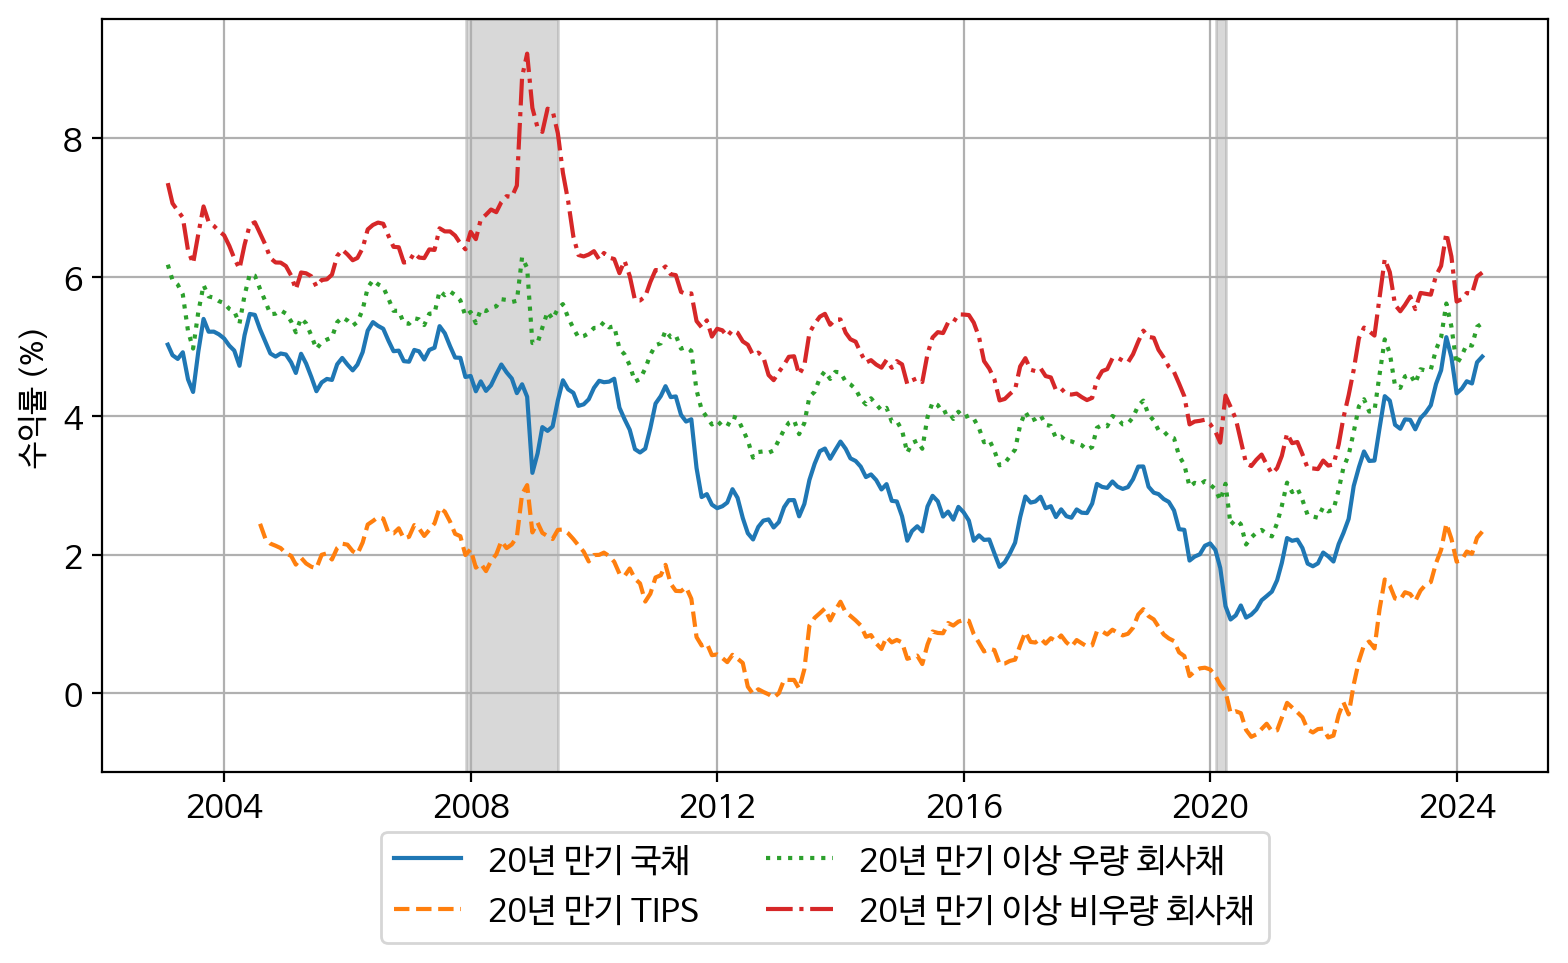

In [ ]:
plt.plot(df['DGS20'], label='20년 만기 국채')
plt.plot(df['DFII20'], label='20년 만기 TIPS',linestyle='dashed')
plt.plot(df['DAAA'], label='20년 만기 이상 우량 회사채', linestyle='dotted')
plt.plot(df['DBAA'], label='20년 만기 이상 비우량 회사채', linestyle='dashdot')

plt.axvspan('2007-12','2009-06', alpha=0.3, color='grey')
plt.axvspan('2020-02','2020-04', alpha=0.3, color='grey')

plt.ylabel('수익률 (%)',fontsize=11)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

save_fig('bond_20yrs')

plt.show()

## 안전자산 선호현상(flight to quality): 신용스프레드

In [ ]:
# Moody's Seasoned Aaa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity (AAA10Y)
# Moody's Seasoned Baa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity (BAA10Y)

var_list = ['AAA10Y','BAA10Y']
start = date(1990,1,1)
end = date(2024,5,1)

spread = pdr.get_data_fred(var_list, start=start, end=end)
spread = df.resample('M').mean()

Saving figure credit_spread_us


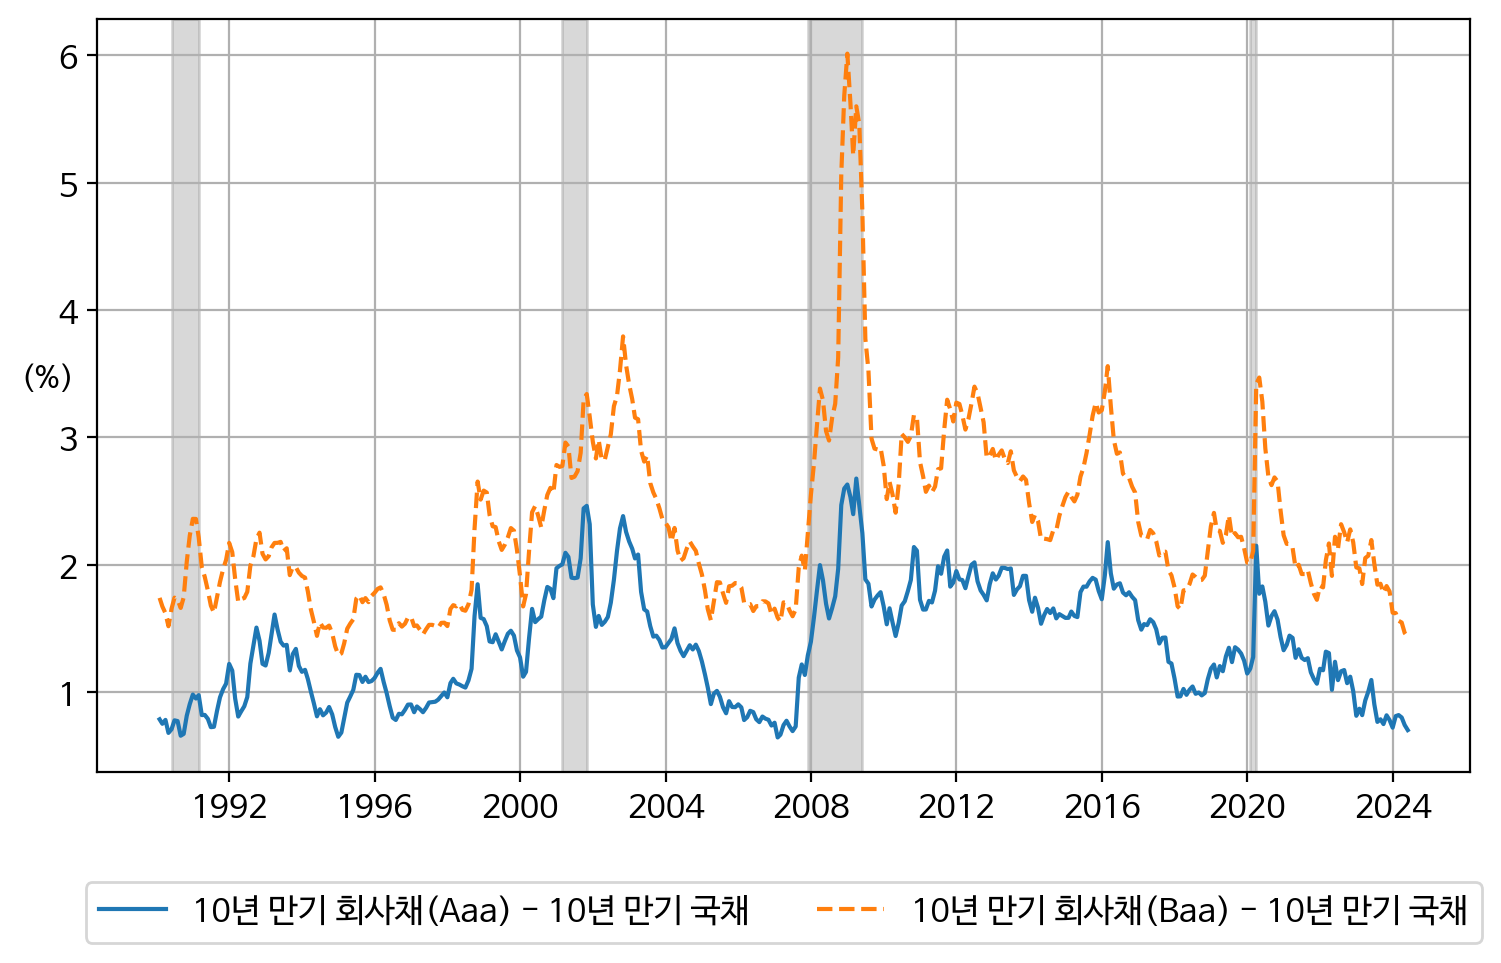

In [ ]:
plt.plot(spread['AAA10Y'], label='10년 만기 회사채(Aaa) - 10년 만기 국채')
plt.plot(spread['BAA10Y'], label='10년 만기 회사채(Baa) - 10년 만기 국채', linestyle='dashed')

plt.axvspan('1990-06','1991-03', alpha=0.3, color='grey')
plt.axvspan('2001-03','2001-11', alpha=0.3, color='grey')
plt.axvspan('2007-12','2009-06', alpha=0.3, color='grey')
plt.axvspan('2020-02','2020-04', alpha=0.3, color='grey')

plt.ylabel('(%)',fontsize=11, rotation=0)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

save_fig('credit_spread_us')

plt.show()

## 단기flight from maturity

- analysis_ECOS.ipynb (레고랜드 관련 연구) 참고할 것

In [ ]:
def gen_df_CP(kind, date_range):
    '''
    import and generate dataframe for CP rate by credit ratings
    df: filename
    kind: credit rating (example: 'A1','A2' for A2+,'A3' for A3+)
    date_range: '2001_2301' or '2301_2306'
    '''
    filepath = '/Users/park/Dropbox/research/2023Legoland/analysis/data/CP_'+kind+'_'+date_range+'.xls'
    df = pd.read_excel(filepath)

    # remove unncessary parts
    df = df.loc[15:,:]

    # column name: maturity + rating
    colname = ['7d','15d','1m','3m','6m','1y']
    colname_new = [i+'_'+kind for i in colname]

    df.columns = ['ddate', 'kind']+ colname_new
    if date_range=='2001_2301':
        df = df.loc[df['kind']=='민평평균']
        df.drop(['kind'],axis=1,inplace=True)
    else:
        df = df.loc[df['kind']=='4사 평균']
        df.drop(['kind'],axis=1,inplace=True)

    df['ddate'] = pd.to_datetime(df['ddate'],format="%Y-%m-%d")
    df.set_index('ddate',inplace=True)

    return df

In [ ]:
df_A1 = gen_df_CP('A1','2001_2301')
df_A1_later = gen_df_CP('A1','2301_2306')
dfA1 = pd.concat([df_A1,df_A1_later],axis=0)

df_A2 = gen_df_CP('A2','2001_2301')
df_A2_later = gen_df_CP('A2','2301_2306')
dfA2 = pd.concat([df_A2,df_A2_later],axis=0)

df_A3 = gen_df_CP('A3','2001_2301')
df_A3_later = gen_df_CP('A3','2301_2306')
dfA3 = pd.concat([df_A3,df_A3_later],axis=0)

CPrate = pd.concat([dfA1,dfA2,dfA3],axis=1)
CPrate.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/park/Dropbox/research/2023Legoland/analysis/data/CP_A1_2001_2301.xls'

## 국채와 TIPS 간 수익률 차이

In [ ]:
# install pandas-datareader in your system
#!pip install pandas-datareader

In [ ]:
# 10-Year Treasury Constant Maturity Rate = DGS10
# 10-Year Treasury Inflation-Indexed Security, Constant Maturity = DFI10

var_list = ['DGS10','DFII10']
start = date(2003,1,1)
end = date(2024,5,1)

df = pdr.get_data_fred(var_list, start=start, end=end)

df.columns = ['T10','TIPS10']

# change the daily frequency into monthly
df = df.resample('M').mean()

# get the difference
df['ExpInf'] = df['T10'] - df['TIPS10']
print(df.head(2))
print(df.tail(2))
print(df['ExpInf'].mean())

             T10  TIPS10  ExpInf
DATE                            
2003-01-31 4.049   2.294   1.754
2003-02-28 3.903   1.990   1.913
             T10  TIPS10  ExpInf
DATE                            
2024-04-30 4.539   2.145   2.394
2024-05-31 4.630   2.250   2.380
2.087836383006752


Saving figure TIPS


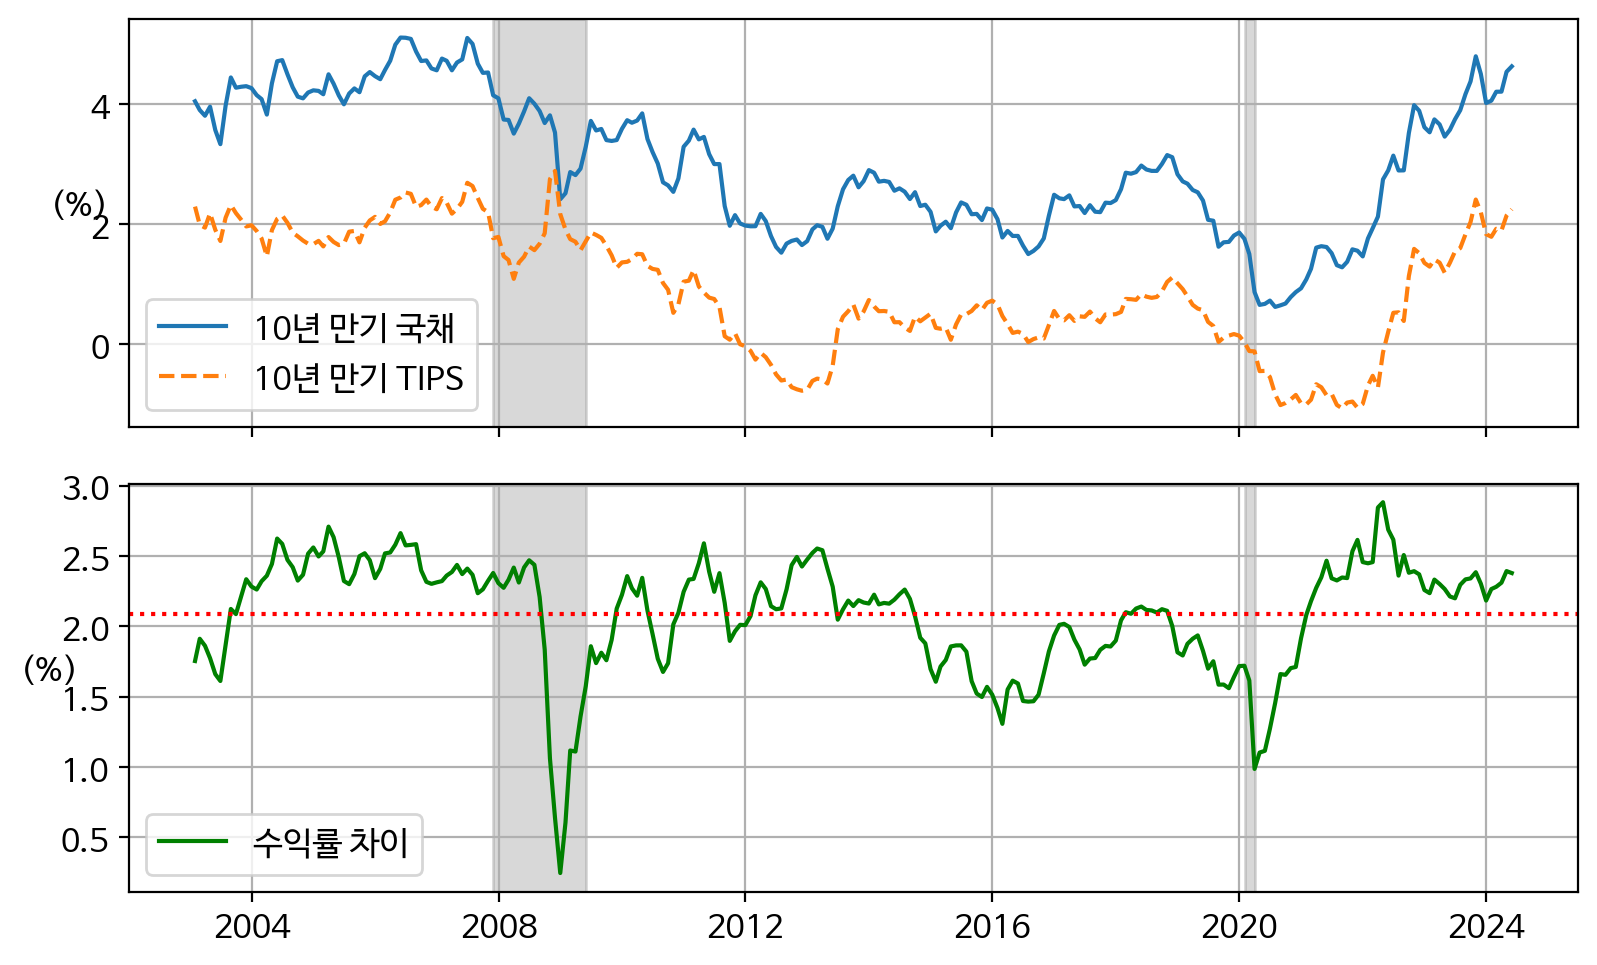

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8, 5))

ax1.plot(df['T10'], label='10년 만기 국채')
ax1.plot(df['TIPS10'], label='10년 만기 TIPS', linestyle='dashed')
ax1.set_ylabel("(%)", rotation=0)
ax1.axvspan('2007-12','2009-06', alpha=0.3, color='grey')
ax1.axvspan('2020-02','2020-04', alpha=0.3, color='grey')
ax1.legend()

ax2.plot(df['ExpInf'], label='수익률 차이', color='g')
ax2.set_ylabel("(%)", rotation=0)
ax2.axhline(y=df['ExpInf'].mean(), color='r', linestyle='dotted')
ax2.axvspan('2007-12','2009-06', alpha=0.3, color='grey')
ax2.axvspan('2020-02','2020-04', alpha=0.3, color='grey')
ax2.legend()

save_fig('TIPS')

plt.show()